In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
plt.style.use("default")
plt.rcParams.update({'font.size': 22})

palette = ["#e072b5",
"#69b15f",
"#737df6",
"#c79737",
"#b67ae4",
"#e57368",
"#799ddb"]

In [3]:
df = pd.read_csv("../Data/NetworkStats/networkStats_byMonth.csv")

#Go through Dec 31 2019 to fit patent data
df = df[df["month"] < "2020-01"]

lcc_df = pd.read_csv("../Data/NetworkStats/lcc_stats.csv")

patent_df = pd.read_csv("../Data/NetworkStats/patent_stats.csv")

patent_avg_degree_df = pd.read_csv("../Data/NetworkStats/patent_avg_degree.csv")

#Edit patents to fit 1980-2020 range
patent_df = patent_df[patent_df["month"] >= "1980-01"]
patent_df = patent_df[patent_df["month"] < "2020-01"]

#Sort avg degree df, and add it to patent_df
patent_avg_degree_df = patent_avg_degree_df.sort_values("month")
patent_df["AvgPatentDegree"] = patent_avg_degree_df["AvgDegree"].tolist()

print(df.head())
print("-------------------------------------")
print(lcc_df.head())
print("-------------------------------------")
print(patent_df.head())

     month  Unnamed: 0    Nodes      Edges  Cpd Nodes  Patent Nodes  \
0  1980-01           0  5130181  159501777     551235       4578946   
1  1980-02           0  5139634  159977594     560688       4578946   
2  1980-03           0  5146304  160406332     567358       4578946   
3  1980-04           0  5158307  161066225     579361       4578946   
4  1980-05           0  5165540  161369400     586594       4578946   

   Avg Degree  Cpd Avg Degree  Patent Avg Degree  LCC Size  
0   62.181735      289.353501          34.833732   5035294  
1   62.252524      285.323734          34.937646   5045106  
2   62.338460      282.725073          35.031278   5052457  
3   62.449259      278.006675          35.175393   5065285  
4   62.479199      275.095552          35.241604   5073025  
-------------------------------------
   Unnamed: 0    month  newIds  newIds_newLCC  newIds_nonLCC  oldIds_newLCC  \
0           0  1980-01       0              0              0              0   
1          

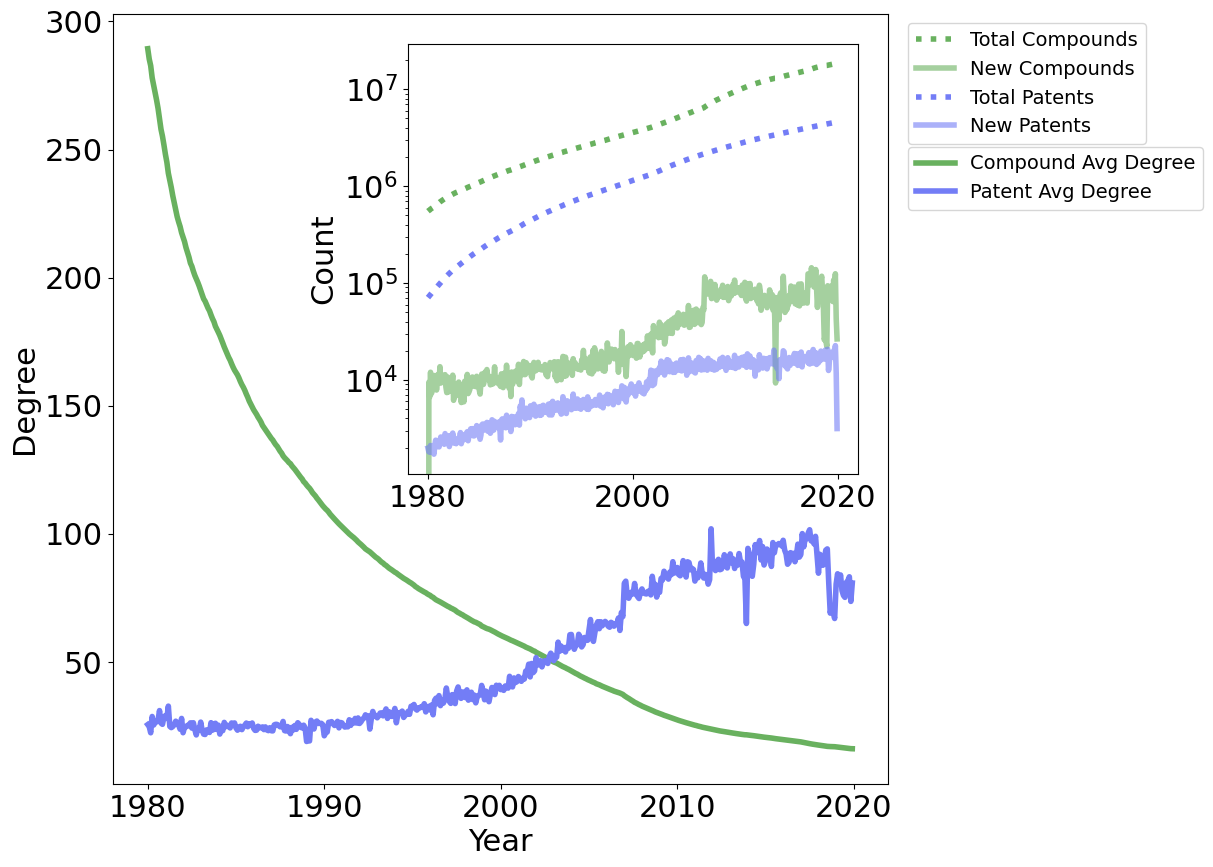

In [6]:
fig, ax1 = plt.subplots(figsize=(10,10))

xs = list(np.arange(1980, 2020, 1/12))

ln1 = ax1.plot(xs, df["Cpd Avg Degree"], linewidth=4, label="Compound Avg Degree", 
               color=palette[1])
ln6 = ax1.plot(xs, patent_df["AvgPatentDegree"], linewidth=4, label="Patent Avg Degree", 
               color=palette[2])

#ax2 = ax1.twinx()
ax2 = fig.add_axes([0.42,0.42,0.45,0.43]) #left, bottom, width, height coordinates
ln2 = ax2.plot(xs, df["Cpd Nodes"], linewidth=4, label="Total Compounds", color=palette[1],
              linestyle="dotted",)
ln3 = ax2.plot(xs, lcc_df["newIds"].tolist(), linewidth=4, label="New Compounds", color=palette[1], alpha=0.6)

ln4 = ax2.plot(xs, patent_df["totalPatents"], linewidth=4, label="Total Patents", 
               linestyle="dotted", color=palette[2])
ln5 = ax2.plot(xs, patent_df["newPatents"].tolist(), linewidth=4, label="New Patents", 
                color=palette[2], alpha=0.6)

ax2.set_yscale("log")

# lns = ln2 + ln3 + ln4 + ln5 + ln1 + ln6
# labels = [l.get_label() for l in lns]
# ax1.legend(lns, labels, prop={"size":14}, bbox_to_anchor=(1.5, 1.02))
ax1.legend(prop={"size":14}, bbox_to_anchor=(1.42, 0.84)) #Degrees
ax2.legend(prop={"size":14}, bbox_to_anchor=(1.09, 1.07)) #Total/new compounds

ax1.set_xlabel("Year")
ax1.set_ylabel("Degree")
ax2.set_ylabel("Count")

plt.show()

Defense figures

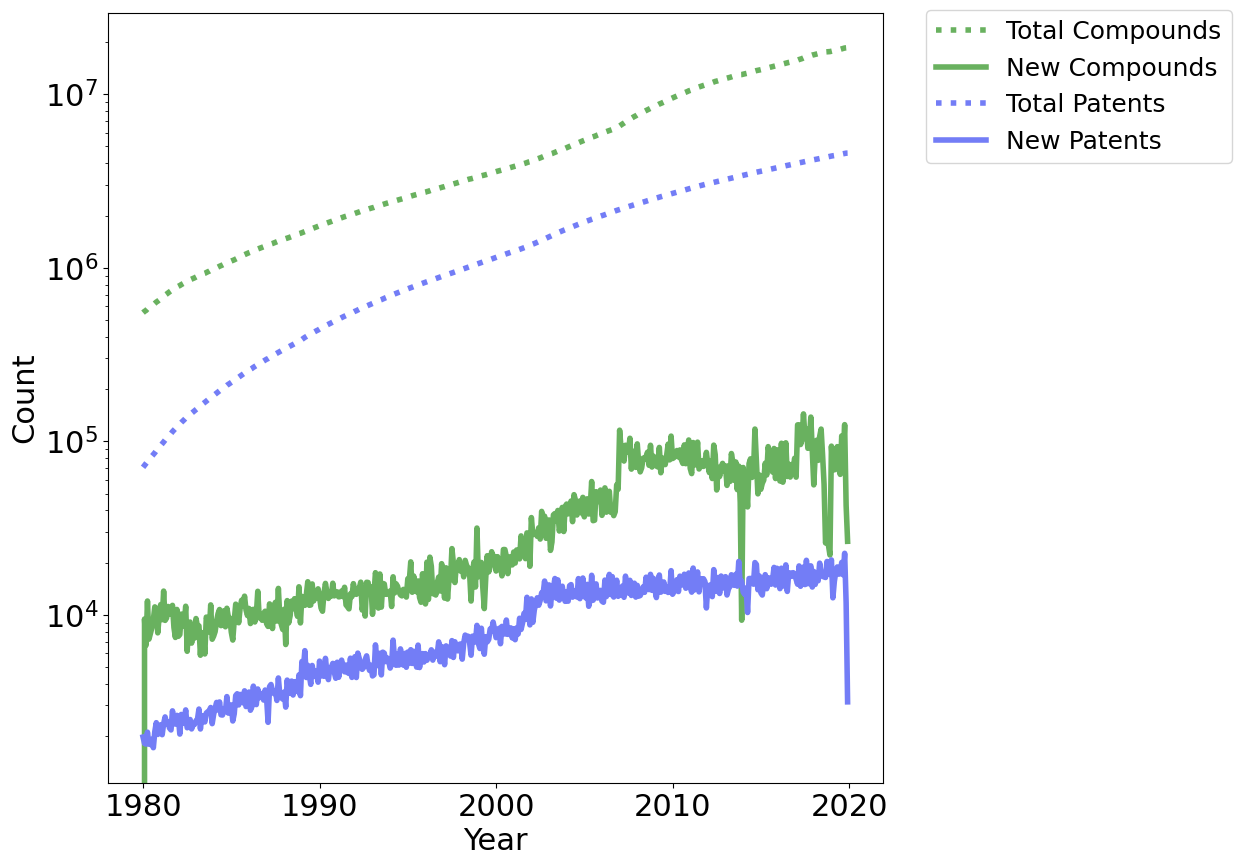

In [15]:
### Total & New compounds
fig, ax2 = plt.subplots(figsize=(10,10))

ln2 = ax2.plot(xs, df["Cpd Nodes"], linewidth=4, label="Total Compounds", color=palette[1],
              linestyle="dotted",)
ln3 = ax2.plot(xs, lcc_df["newIds"].tolist(), linewidth=4, label="New Compounds", color=palette[1])

ln4 = ax2.plot(xs, patent_df["totalPatents"], linewidth=4, label="Total Patents", 
               linestyle="dotted", color=palette[2])
ln5 = ax2.plot(xs, patent_df["newPatents"].tolist(), linewidth=4, label="New Patents", 
                color=palette[2])

ax2.set_ylabel("Count")
ax2.set_xlabel("Year")

ax2.set_yscale("log")
ax2.legend(prop={"size":18}, bbox_to_anchor=(1.04, 1.02))

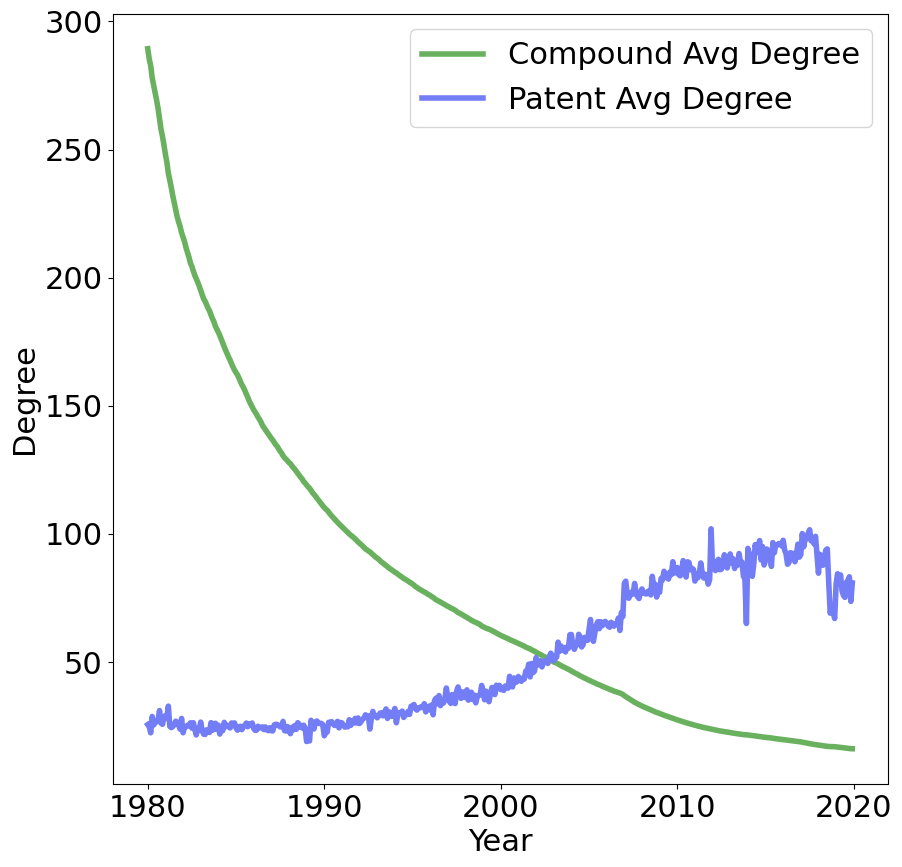

In [19]:
### Basic network statistics over time
fig, ax1 = plt.subplots(figsize=(10,10))

xs = list(np.arange(1980, 2020, 1/12))

ln1 = ax1.plot(xs, df["Cpd Avg Degree"], linewidth=4, label="Compound Avg Degree", 
               color=palette[1])
ln6 = ax1.plot(xs, patent_df["AvgPatentDegree"], linewidth=4, label="Patent Avg Degree", 
               color=palette[2])

ax1.set_ylabel("Degree")
ax1.set_xlabel("Year")

ax1.legend()